<a href="https://colab.research.google.com/github/lromeror/DataVisualization/blob/main/VisualMultiVariables/Multivariables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy as sp

In [49]:
df=pd.read_csv('https://raw.githubusercontent.com/lromeror/DataVisualization/main/VisualMultiVariables/pinguinos.csv')
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


##Scatter Plot
- Muestra Aletoria del dataset

Existira alguna correlacion?

In [50]:
plt.style.use('seaborn-whitegrid')

<ipython-input-50-adcf1482bdd0>:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



<Axes: xlabel='flipper_length_mm', ylabel='culmen_length_mm'>

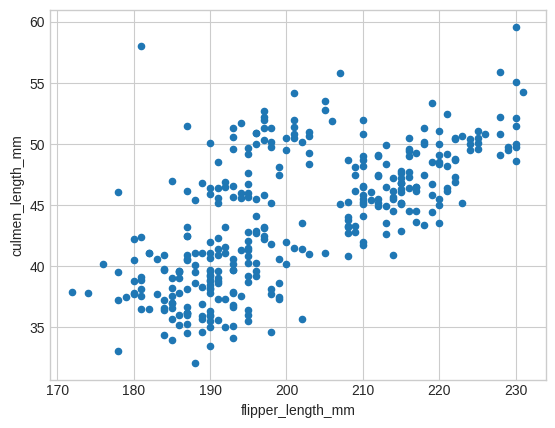

In [51]:
df.plot.scatter(x='flipper_length_mm',y='culmen_length_mm')

<Axes: xlabel='flipper_length_mm', ylabel='culmen_length_mm'>

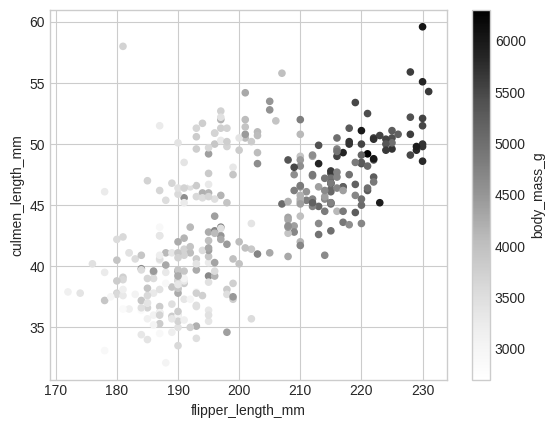

In [52]:
df.plot.scatter(x='flipper_length_mm',y='culmen_length_mm',c='body_mass_g')

In [53]:
fig=px.scatter(df,x='flipper_length_mm',y='culmen_length_mm',color='species')
fig.update_layout(
    width=900,  # Ancho en píxeles
    height=500  # Alto en píxeles
)
fig.show()

Grafico de dispersion categorico

In [54]:
sns.set_style('whitegrid')

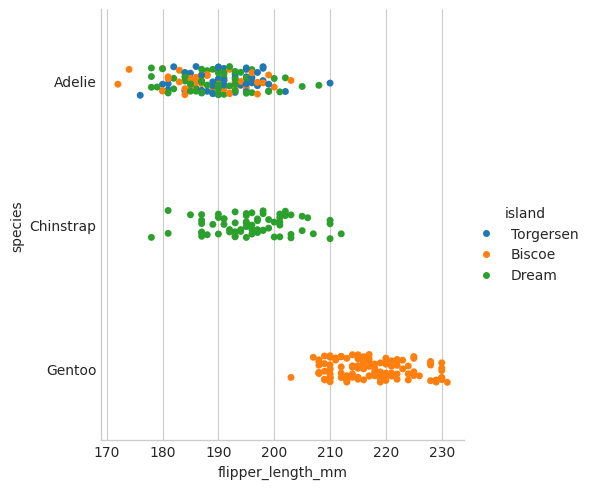

In [55]:
sns.catplot(data=df,x='flipper_length_mm',y='species', hue='island')# Se ve cuantos punto hay en una variable categorica con respecto a una cantidad
#Catplot, muy interesante para ver como se reparte en conjunto

## Regresion

- Es un Scatter plot
- Tiene una linea de tendencia "Line of Best Fit"
- Variables Numericas
- Distribucion de las variables
- No usar cuando se tiene demasiados puntos

Calculando el coeficiente de correlacion:
- p < 0.05 (p-value) es Check Se cumple la hipotesis

In [60]:
# Eliminar filas con NaN en las columnas específicas
df_clean = df[['flipper_length_mm', 'culmen_length_mm']].dropna()

# Calcular la correlación de Pearson
r, p = sp.stats.pearsonr(df_clean['flipper_length_mm'], df_clean['culmen_length_mm'])
r,p

(0.656181340746428, 1.7439736176204127e-43)

Text(220, 38, 'p =1.743')

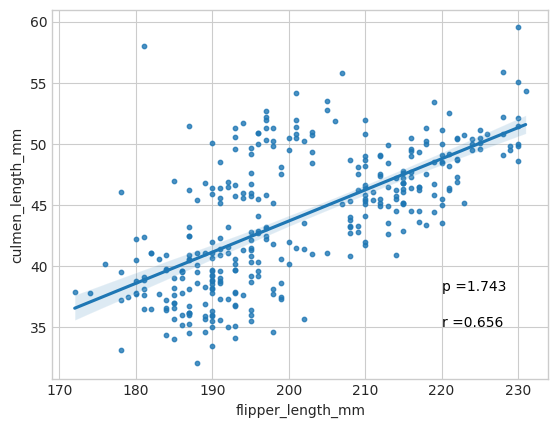

In [68]:
sns.regplot(data=df,x='flipper_length_mm',y='culmen_length_mm',scatter_kws={'s':10})
plt.text(220,35,f'r ={str(r)[0:5]}',color='black')
plt.text(220,38,f'p ={str(p)[0:5]}',color='black')

Especie Gentoo

In [70]:
df_gentoo=df[df['species']=='Gentoo']
df_gentoo = df_gentoo[['flipper_length_mm', 'culmen_length_mm']].dropna()
r, p = sp.stats.pearsonr(df_gentoo['flipper_length_mm'], df_gentoo['culmen_length_mm'])
r,p

(0.6611621224825641, 8.597007825179033e-17)

Text(225, 43, 'p =8.597')

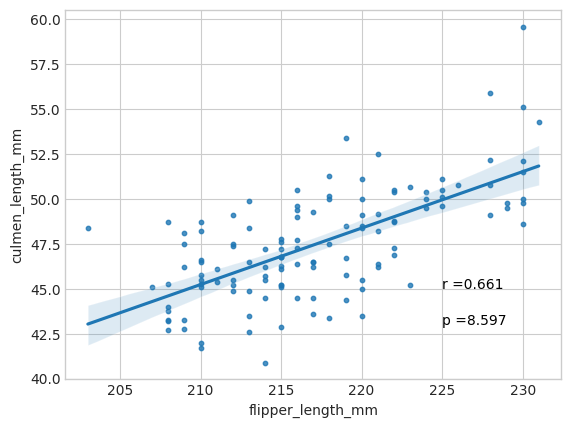

In [92]:
sns.regplot(df_gentoo,x='flipper_length_mm',y='culmen_length_mm',scatter_kws={'s':10})
plt.text(225,45,f'r ={str(r)[0:5]}',color='black')
plt.text(225,43,f'p ={str(p)[0:5]}',color='black')

Especie Adelie

In [93]:
df_adelie=df[df['species']=='Adelie']
df_adelie = df_adelie[['flipper_length_mm', 'culmen_length_mm']].dropna()
r, p = sp.stats.pearsonr(df_adelie['flipper_length_mm'], df_adelie['culmen_length_mm'])
r,p

(0.3257847151651594, 4.465484645884534e-05)

Los datos que proporcionaste parecen ser el coeficiente de correlación de Pearson y el valor p de una regresión lineal:

Coeficiente de correlación de Pearson (r = 0.3258): Este valor indica la fuerza y la dirección de la relación lineal entre dos variables. En este caso, un valor de 0.3258 sugiere una correlación positiva moderada entre las variables. Esto significa que, en general, a medida que una variable aumenta, la otra también tiende a aumentar, aunque no de manera muy fuerte.

Valor p (p = 4.465e-05): El valor p indica la significancia estadística de la correlación. Un valor p muy pequeño (como este, que es mucho menor que el nivel comúnmente utilizado de 0.05) indica que hay suficiente evidencia para rechazar la hipótesis nula de que no hay correlación entre las dos variables. En otras palabras, es muy poco probable que esta correlación observada haya ocurrido por casualidad.

Text(205, 34, 'p =4.465')

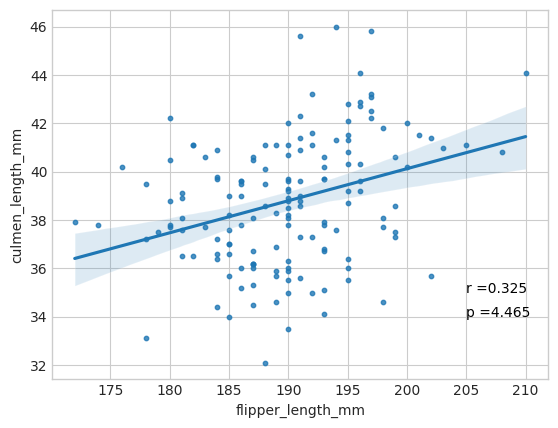

In [105]:
sns.regplot(df_adelie,x='flipper_length_mm',y='culmen_length_mm',scatter_kws={'s':10})
plt.text(205,35,f'r ={str(r)[0:5]}',color='black')
plt.text(205,34,f'p ={str(p)[0:5]}',color='black')

##JoinPlot

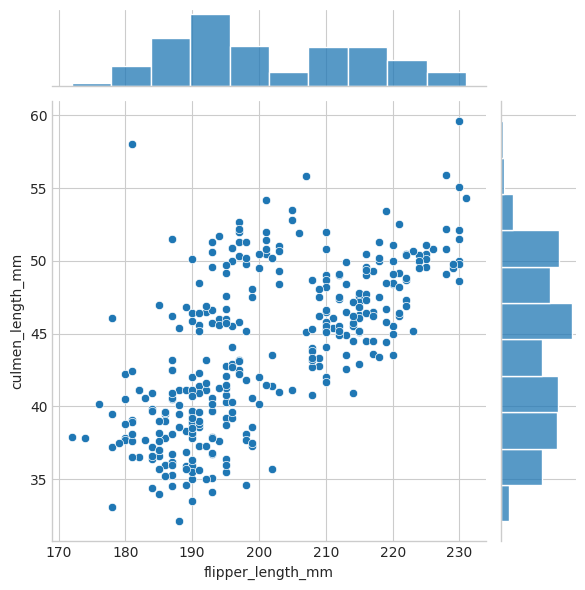

In [108]:
sns.jointplot(data=df,x='flipper_length_mm',y='culmen_length_mm')

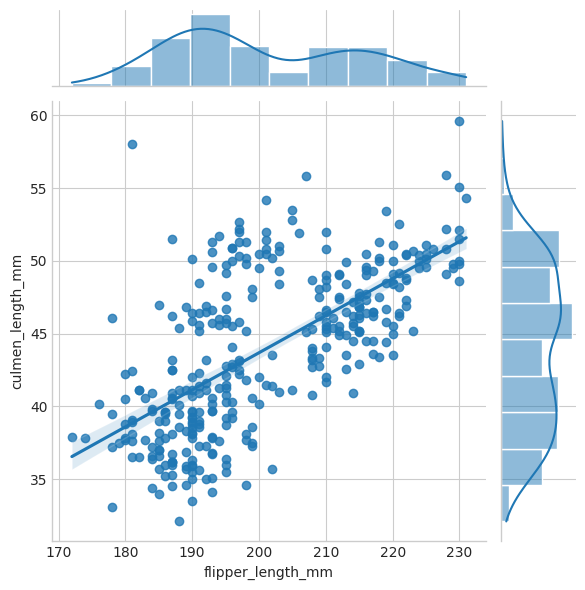

In [109]:
sns.jointplot(data=df,x='flipper_length_mm',y='culmen_length_mm',kind='reg')

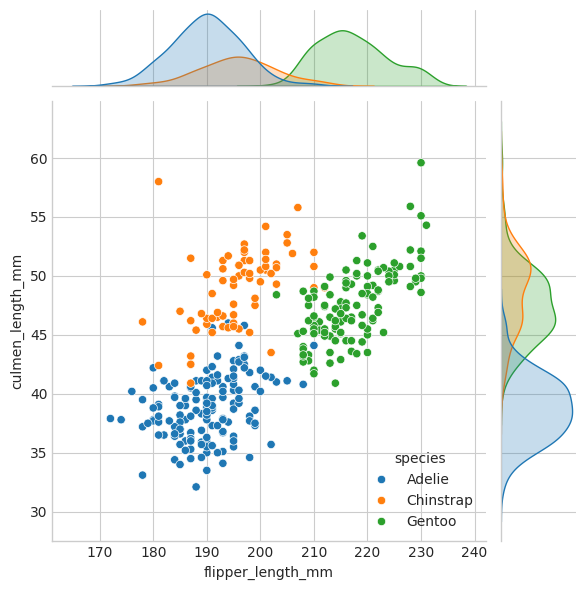

In [107]:
sns.jointplot(data=df,x='flipper_length_mm',y='culmen_length_mm',hue='species')